# Simple Linear Regression 

In [29]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Delivery_time -> Predict delivery time using sorting time 

#Build a simple linear regression model by performing EDA 
#and do necessary transformations and select the best model using R or Python.

In [3]:
#Reading the dataset
dataset=pd.read_csv('delivery_time.csv')

In [4]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#  EDA & Data Visualisation

In [5]:
#info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
#Checking Null Values 
dataset.isnull().any()

Delivery Time    False
Sorting Time     False
dtype: bool

<Axes: >

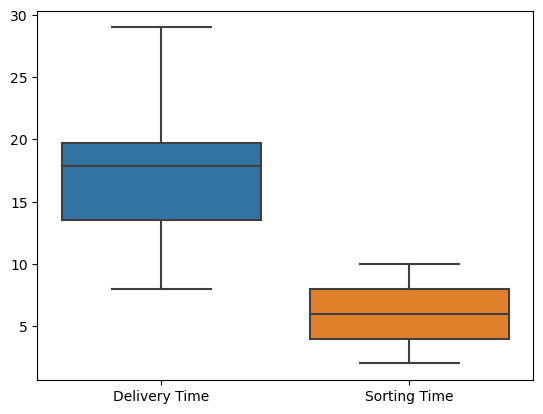

In [7]:
#Checking Outliers
sns.boxplot(dataset)

## There are no outliers present

In [8]:
#Checking duplicates
dataset[dataset.duplicated()]

,Delivery Time,Sorting Time


<Axes: xlabel='Delivery Time', ylabel='Density'>

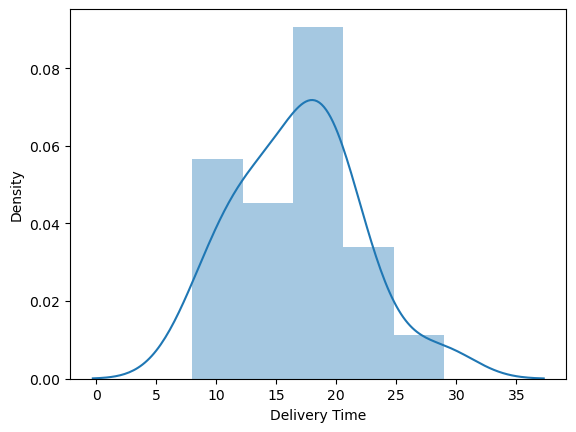

In [9]:
sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

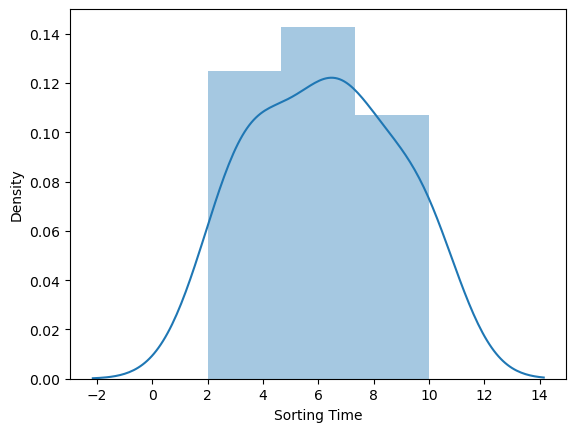

In [10]:
sns.distplot(dataset['Sorting Time'])

# Feature Engineering

In [11]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
#Correlation analysis
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


#Correlation co-efficient > 0.8 which is a good indicator that there is sufficient correlation btw Delivery & Sorting time

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

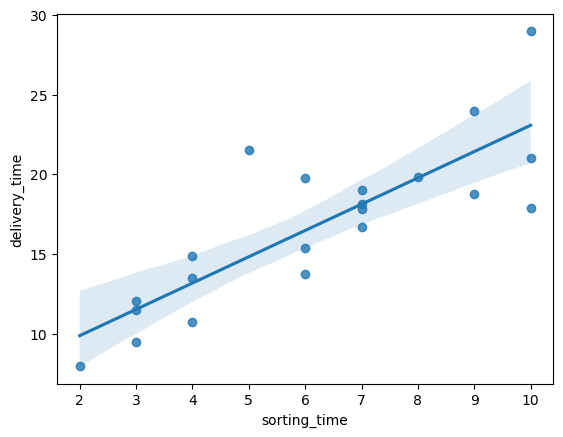

In [13]:
#Regression plot
sns.regplot(x =dataset['sorting_time'],y = dataset['delivery_time'])

# Model Building

In [14]:
model = smf.ols("delivery_time~sorting_time",data = dataset).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        17:01:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [15]:
# Finding Coefficient parametersof the linear equation y =beta1*x + beta0
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model prediction without feature transformation

In [17]:
#Manual Prediction for sorting time lets say 5 
del_time = 1.649020 * 5 + 6.582734
del_time

14.827834

In [18]:
#Automatic Prediction for say sorting time 5,8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [19]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [20]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [21]:
#Prediction Values without feature Transformation
predicted =pd.DataFrame()
predicted['Sorting_Time'] = dataset['sorting_time']
predicted['Delivery_Time'] = dataset['delivery_time']
predicted['Predicted_Delivery_Time']= model.predict((dataset['sorting_time']))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# Model Prediction with Feature transformation

## As we have seen the Rsquared & Adjusted Rsquared values are less than 0.80,The model can be improved by transformation of features and then checking the Rsquared &  Adjusted Rsquare values



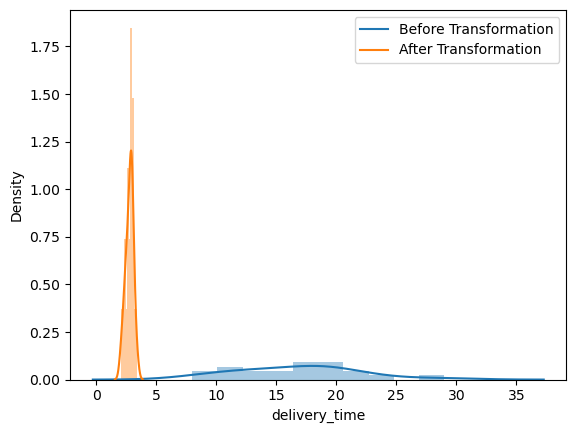

In [25]:
#Trying different transformation of data to estimate normal distribution and to remove any skewness

labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(dataset['delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

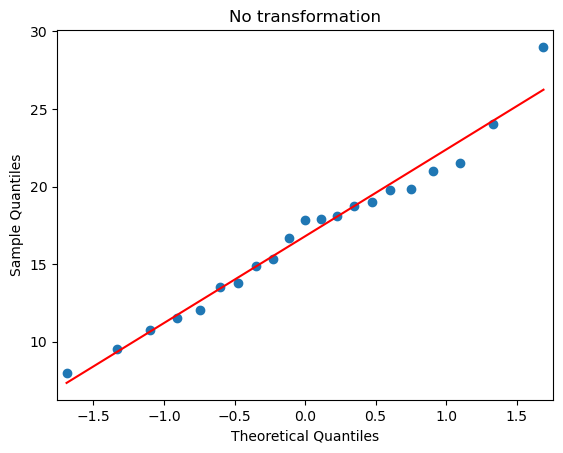

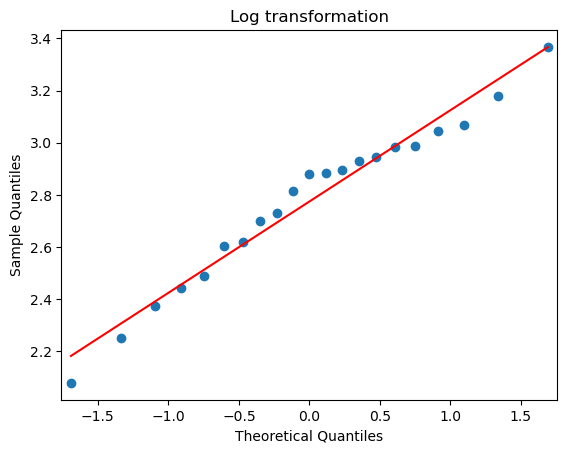

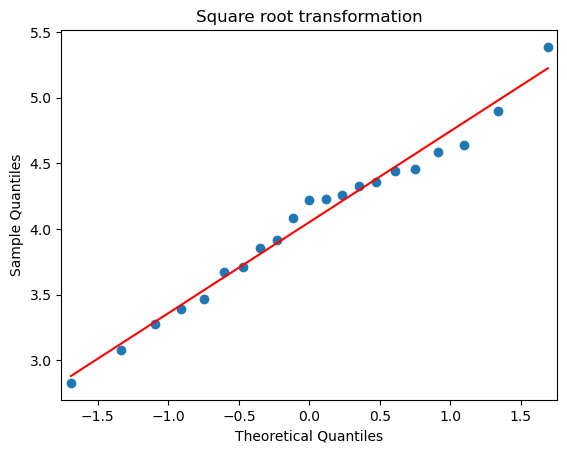

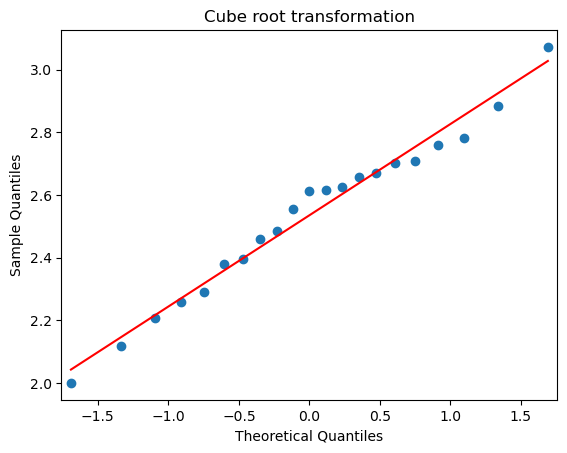

In [32]:
sm.qqplot(dataset['delivery_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(dataset['delivery_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(dataset['delivery_time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(dataset['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

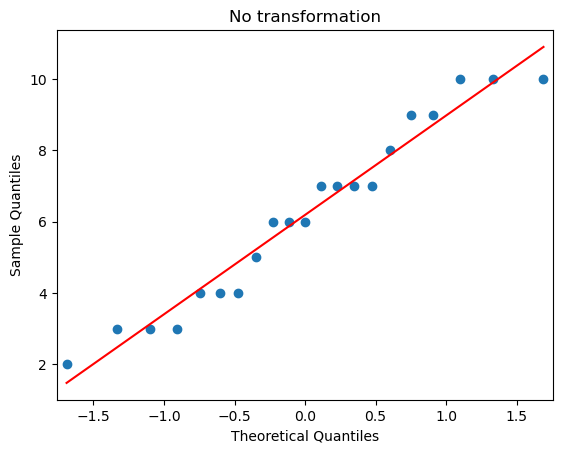

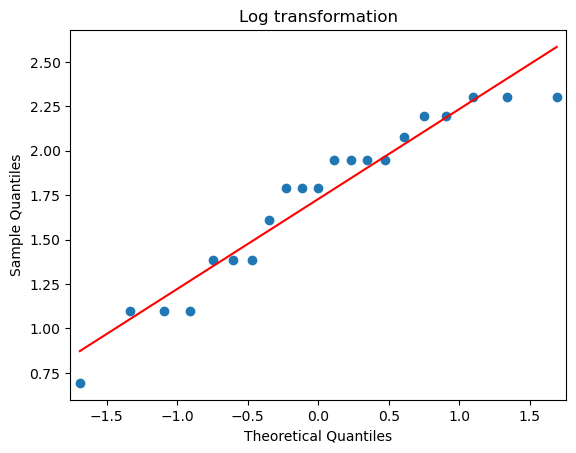

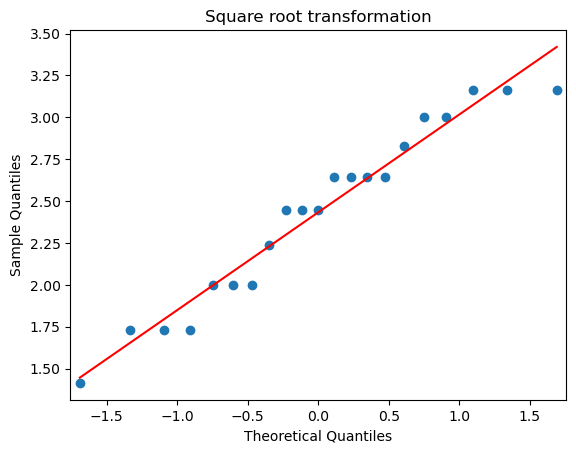

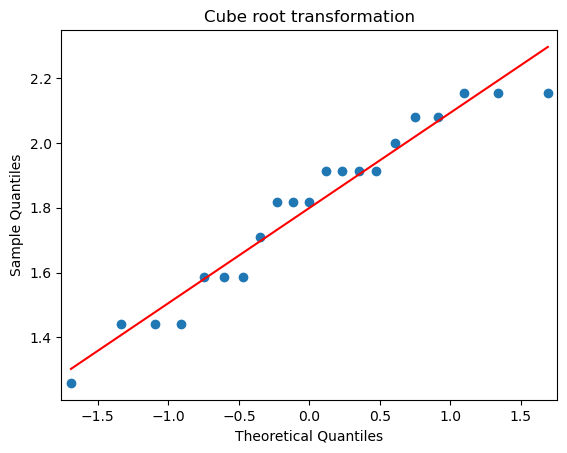

In [33]:
sm.qqplot(dataset['sorting_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(dataset['sorting_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(dataset['sorting_time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(dataset['sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

## Square Root Transformation of data



In [37]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 27 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                            17:55:55   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction

## cuberoot transformation

In [39]:
model2 = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 27 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                            17:58:48   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 #R-squared and Adjusted R-squared scores have increased but they are still below 0.85

## Logarithmic transformation

In [40]:
model3 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 27 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                           18:00:33   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

In [41]:
#Prediction Values with log feature Transformation
predicted =pd.DataFrame()
predicted['Sorting_Time'] = dataset['sorting_time']
predicted['Delivery_Time'] = dataset['delivery_time']
predicted['Predicted_Delivery_Time']= model3.predict((dataset['sorting_time']))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,3.117833
1,4,13.50,2.570329
2,6,19.75,2.812603
3,9,24.00,3.054878
4,10,29.00,3.117833
5,6,15.35,2.812603
6,7,19.00,2.904712
7,3,9.50,2.398432
8,10,17.90,3.117833
9,9,18.75,3.054878
